<a href="https://colab.research.google.com/github/PrashantS87/Time_Series_Forecasting/blob/main/TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from openpyxl import load_workbook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
workbook = load_workbook(filename='/content/drive/MyDrive/TSF_Forecasting/Data.xlsx', read_only=True)
worksheet_names = workbook.sheetnames
worksheet_names

['Past Data Till July 24', 'Future Actual Data Aug 24']

In [53]:
df = pd.read_excel('/content/drive/MyDrive/TSF_Forecasting/Data.xlsx', sheet_name=worksheet_names[0], index_col='Date Time',parse_dates=['Date Time'])

In [54]:
df.columns

Index(['GEO', 'Categories_New', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [55]:
df = df.drop(columns= ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'])

In [56]:
df.head(2)

,GEO,Categories_New
Date Time,,
2021-07-02,EMEA,Activity_1
2021-07-02,AMS,Activity_1


In [63]:
import pandas as pd
df_date_counts = df.groupby(df.index.date).size().reset_index(name='Volume')

In [64]:
df_date_counts.head()

,index,Volume
0,2021-04-05,17
1,2021-04-06,34
2,2021-04-07,51
3,2021-04-08,40
4,2021-04-09,29


In [66]:
df_unique_dates = pd.merge(df, df_date_counts, left_on=df.index.date, right_on='index', how='left')
df_unique_dates = df_unique_dates.drop_duplicates(subset=['index'])
df_unique_dates = df_unique_dates[['index', 'Volume']]
df_1 = df_unique_dates.reset_index(drop=True)
print(df_1.head())




        index  Volume
0  2021-07-02      55
1  2021-07-01      61
2  2021-06-30      64
3  2021-06-29      71
4  2021-06-28      51


## Linear Regression with Time Series

The linear regression algorithm learns how to make a weighted sum from its input features. For two features, we would have:

**target = weight_1 * feature_1 + weight_2 * feature_2 + bias**

Time-step features¶
There are two kinds of features unique to time series: time-step features and lag features.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.


In [50]:
import numpy as np

In [68]:
df_1['Time'] = np.arange(len(df_1.index))
df_1.head()

,index,Volume,Time
0,2021-07-02,55,0
1,2021-07-01,61,1
2,2021-06-30,64,2
3,2021-06-29,71,3
4,2021-06-28,51,4


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

<ipython-input-70-4c5968584b6a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [71]:
%config InlineBackend.figure_format = 'retina'

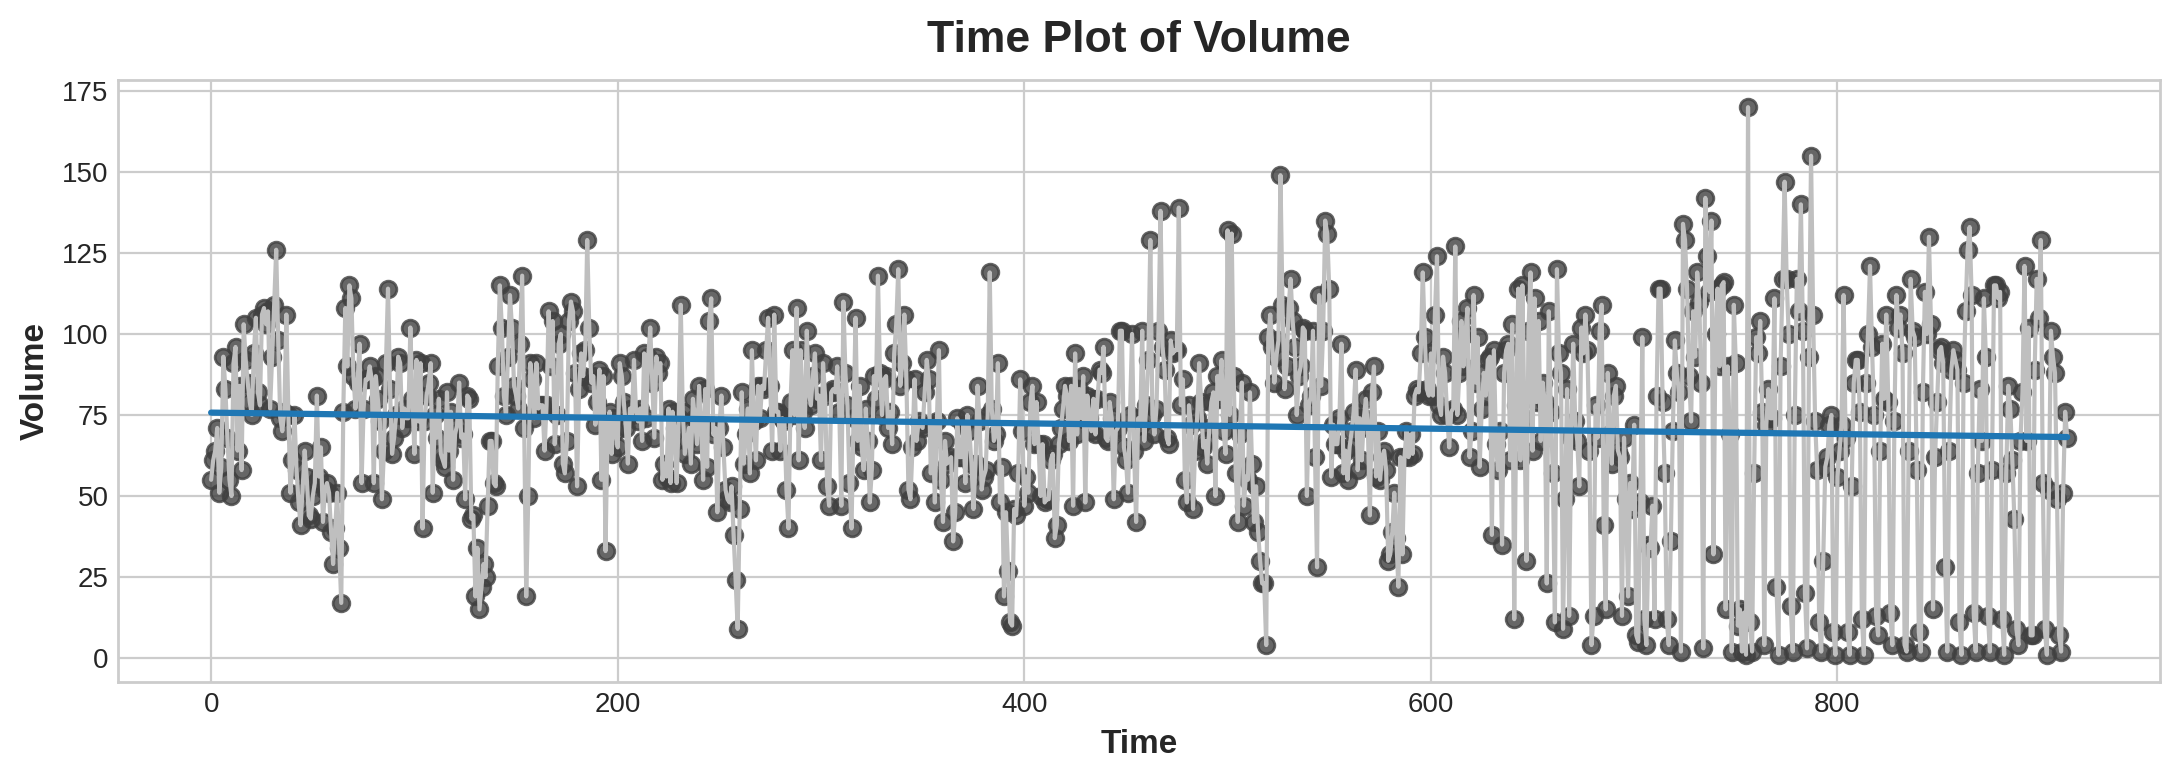

In [73]:
fig, ax = plt.subplots()
ax.plot('Time', 'Volume', data=df_1, color='0.75')
ax = sns.regplot(x='Time', y='Volume', data=df_1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Volume');

In [ ]:
# prompt: what above graph tells me?

# The graph shows a positive linear relationship between time and volume.
# This indicates that the volume of something (likely sales or traffic) is increasing over time.
# The regression line shows the general trend of the volume increase.
# The scatter plot shows the actual volume at each point in time.
# The deviations of the actual volume from the regression line can give you an insight
# into the variability and possible seasonality in the data.


In [74]:
df_1['Lag_1'] = df_1['Volume'].shift(1)
df_1 = df_1.reindex(columns=['Volume', 'Lag_1'])

df_1.head()

,Volume,Lag_1
0,55,NaN
1,61,55.0
2,64,61.0
3,71,64.0
4,51,71.0


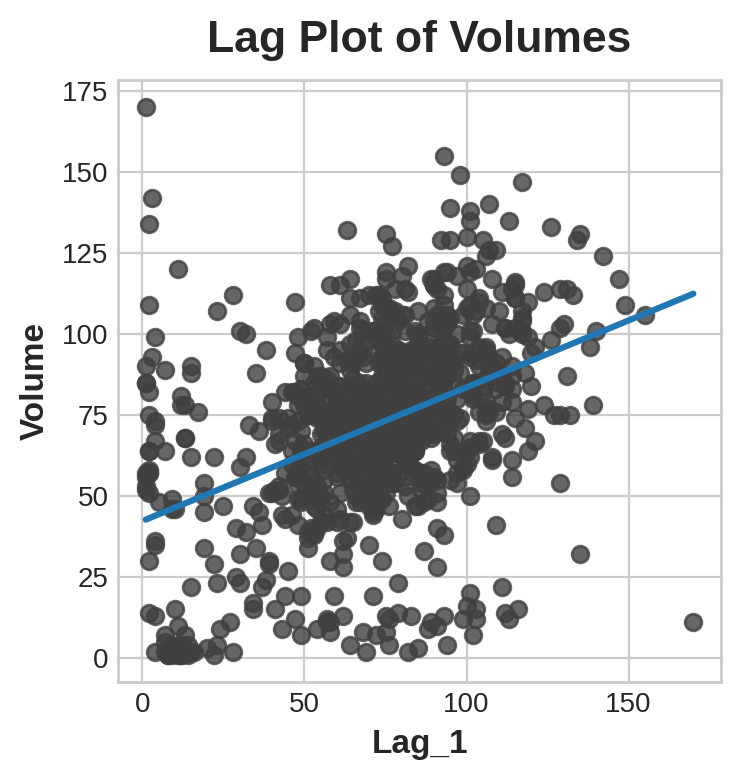

In [76]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Volume', data=df_1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Volumes');

In [ ]:
# prompt: what above graph tells me?

# The Lag Plot of Volumes shows the relationship between the current volume and the volume from the previous time step (Lag_1).
#
# Here's what the graph tells us:
#
# 1. Positive Correlation: The plot shows a generally positive correlation between 'Volume' and 'Lag_1'.
#    This suggests that when the volume was high in the previous time step, it tends to be high in the current time step as well, and vice versa.
# 2. Linear Relationship: The points appear to follow a roughly linear trend. This indicates that there's a linear relationship
#    between the current volume and the lagged volume.
# 3. Possible Autocorrelation: The existence of a strong correlation between the current and lagged volume indicates possible autocorrelation
#    in the time series data. Autocorrelation means that the values in the time series are related to previous values in the series.
# 4. Forecasting Potential: The positive correlation suggests that past volumes can be used to predict future volumes. We can use a linear
#    regression model to predict future volumes based on lagged volumes.
#
# In essence, the Lag plot helps us understand how the time series data behaves in relation to its previous values.
# This information is crucial for building time series forecasting models.
